In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df=pd.read_csv("BostonHousing.csv")

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [6]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [7]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

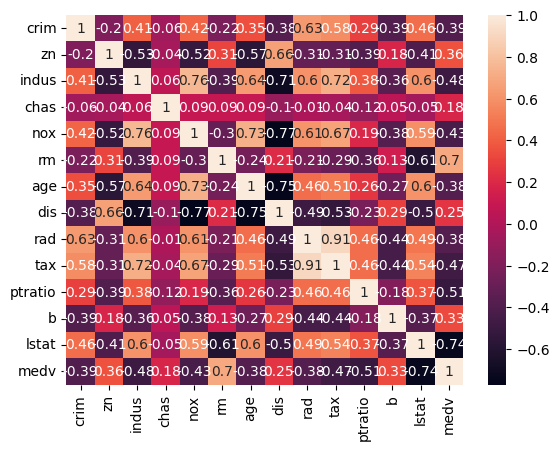

In [8]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

C:\Users\Sakshi Bodkhe\AppData\Local\Temp\ipykernel_16152\2233295577.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['medv'], bins=30)


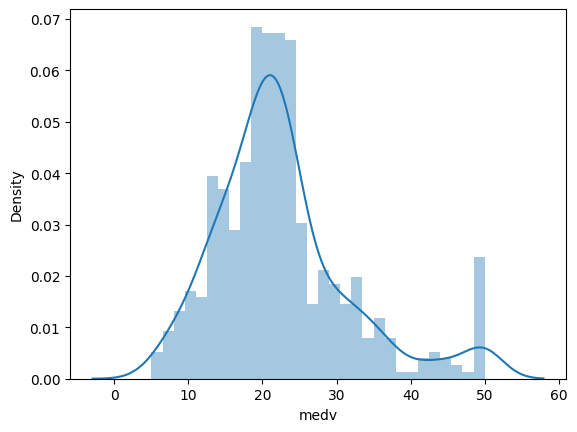

In [9]:
sns.distplot(df['medv'], bins=30)
plt.show()

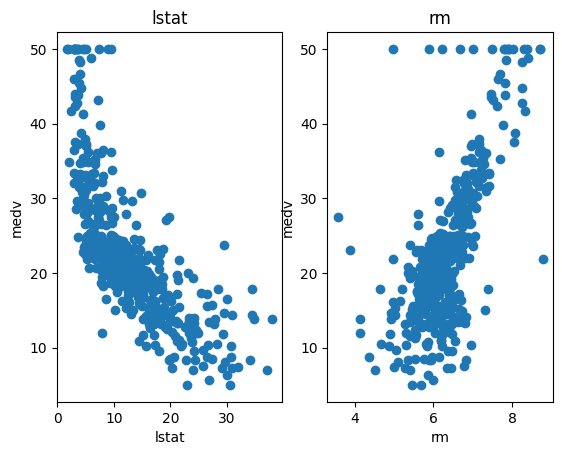

In [10]:
features= ['lstat', 'rm']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = df['medv']
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('medv')

In [11]:

X = df.loc[:, df.columns != 'medv']
y = df.loc[:, df.columns == 'medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [12]:
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

In [13]:


model = Sequential()

model.add(Dense(512, input_shape=(13, ), activation='relu', name='dense_1'))
model.add(Dense(256, activation='relu', name='dense__layer_1'))
model.add(Dense(128, activation='relu', name='dense__layer_2'))
model.add(Dense(64, activation='relu', name='dense_layer_3'))
model.add(Dense(1, activation='relu', name='dense_output'))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               7168      
                                                                 
 dense__layer_1 (Dense)      (None, 256)               131328    
                                                                 
 dense__layer_2 (Dense)      (None, 128)               32896     
                                                                 
 dense_layer_3 (Dense)       (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 179713 (702.00 KB)
Trainable params: 179713 (702.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05, verbose = 1)

Epoch 1/100
11/11 [==============================] - 2s 49ms/step - loss: 356.7341 - mae: 15.6164 - val_loss: 110.6484 - val_mae: 7.6377
Epoch 2/100
11/11 [==============================] - 0s 13ms/step - loss: 87.0817 - mae: 7.0522 - val_loss: 78.5859 - val_mae: 5.9736
Epoch 3/100
11/11 [==============================] - 0s 13ms/step - loss: 55.9882 - mae: 5.3580 - val_loss: 63.5143 - val_mae: 6.1192
Epoch 4/100
11/11 [==============================] - 0s 11ms/step - loss: 47.3121 - mae: 4.9093 - val_loss: 56.5548 - val_mae: 6.3399
Epoch 5/100
11/11 [==============================] - 0s 13ms/step - loss: 39.5128 - mae: 4.5076 - val_loss: 48.9908 - val_mae: 5.4360
Epoch 6/100
11/11 [==============================] - 0s 12ms/step - loss: 36.9882 - mae: 4.3041 - val_loss: 43.2246 - val_mae: 5.2215
Epoch 7/100
11/11 [==============================] - 0s 12ms/step - loss: 32.8115 - mae: 4.1759 - val_loss: 50.8506 - val_mae: 4.4776
Epoch 8/100
11/11 [==============================] - 0s 13m

In [15]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

5/5 [==============================] - 0s 5ms/step - loss: 29.4934 - mae: 4.2909
Mean squared error on test data:  29.493436813354492
Mean absolute error on test data:  4.290882110595703


In [16]:
ypred=model.predict(X_test)

5/5 [==============================] - 1s 3ms/step


In [17]:
ypred

array([[28.397411],
       [31.244097],
       [49.587265],
       [22.839407],
       [31.791208],
       [49.812874],
       [30.090536],
       [12.575232],
       [21.881994],
       [34.943306],
       [26.705755],
       [23.957235],
       [17.137928],
       [34.84874 ],
       [22.279007],
       [24.13539 ],
       [23.632063],
       [43.508797],
       [21.593552],
       [20.739489],
       [15.525279],
       [34.944496],
       [40.827263],
       [47.92182 ],
       [49.55211 ],
       [26.55835 ],
       [18.009619],
       [24.52129 ],
       [23.987476],
       [17.262936],
       [27.415989],
       [38.07083 ],
       [15.388723],
       [23.193937],
       [25.159283],
       [37.639385],
       [28.423742],
       [18.63096 ],
       [18.40304 ],
       [48.761562],
       [33.06083 ],
       [22.985762],
       [32.42498 ],
       [54.34267 ],
       [20.46367 ],
       [27.91709 ],
       [22.874521],
       [24.89712 ],
       [20.280401],
       [29.726542],
